In [126]:
cd C:/Users/syedd/Documents/mine/DCLC3

C:\Users\syedd\Documents\mine\DCLC3


In [127]:
from src.data.building_datasets import *

### Testing Concat dataset

In [ ]:
data1_dir = "data/dataset/New_dataset/Images"
images1 = glob(f"{data1_dir}/*.jpg")
masks1 = [i.replace("Images" , "Masks").replace("jpg","tif") for i in images1]

n_train1 = int(len(images1) * 0.8)

train_images1 = images1[:n_train1]
train_masks1 = masks1[:n_train1]

train_dataset1 = AccBuildingDataset(
    images=train_images1,
    masks=train_masks1,
    augment_factor=1, 
    transform=True, 
    building_threshold=0.1)

val_images1 = images1[n_train1:]
val_masks1 = masks1[n_train1:]

val_dataset1 = AccBuildingDataset(
    images=val_images1,
    masks=val_masks1,
    augment_factor=1, 
    transform=True, 
    building_threshold=0.1)


data2_dir = "data/dataset/New_New_dataset/Images"
images2 = glob(f"{data2_dir}/*.tif")
masks2 = [i.replace("Images" , "Masks") for i in images2]

n_train2 = int(len(images2) * 0.8)

train_images2 = images2[:n_train2]
train_masks2 = masks2[:n_train2]

train_dataset2 = NewNewDataset(
    images=train_images2,
    masks=train_masks2,
    transform=True)

val_images2 = images2[n_train2:]
val_masks2 = masks2[n_train2:]

val_dataset2 = NewNewDataset(
    images=val_images2,
    masks=val_masks2,
    transform=True)

train_list = [train_dataset1 , train_dataset2]
val_list = [val_dataset1,val_dataset2]

train_dataset = ConcatDataset(train_list)
val_dataset = ConcatDataset(val_list)

In [ ]:
len(train_dataset),len(val_dataset)

In [ ]:
image , mask = train_dataset[4000]
visualize_augmentation(image , mask)

In [ ]:
image,mask = augment_image_with_mask(image, mask)
visualize_augmentation(image , mask)

In [ ]:
image,mask = augment_image_with_mask(image, mask)
visualize_augmentation(image , mask)

### Saving val images with aug.

In [128]:
from torchvision.transforms import functional as F
from torchvision import transforms
from torchvision.transforms import transforms
from glob import glob
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import torch

to_tensor = transforms.ToTensor()

def augment_image(image):     
    image = to_tensor(image)
    photometric_transforms = transforms.Compose([
        # transforms.ColorJitter(brightness=0.1, contrast=0.0, saturation=0.0, hue=0.0),
        # transforms.GaussianBlur(kernel_size=(3, 3), sigma=(0.01,0.5)),
        # transforms.Lambda(lambda img: transforms.F.adjust_brightness(img, 0.8)),
        # transforms.Lambda(lambda img: img * torch.tensor([0.95, 1.00, 0.95], device=img.device).view(3, 1, 1)),
        transforms.Lambda(lambda img: img + torch.tensor([0.00, 0.02, 0.00], device=img.device).view(3, 1, 1))
    ])

    image = photometric_transforms(image)

    return image.permute(1,2,0).numpy()

In [129]:
data1_dir = "data/dataset/New_dataset/Images"
images1 = glob(f"{data1_dir}/*.jpg")
masks1 = [i.replace("Images" , "Masks").replace("jpg","tif") for i in images1]

data2_dir = "data/dataset/New_New_dataset/Images"
images2 = glob(f"{data2_dir}/*.tif")
masks2 = [i.replace("Images" , "Masks") for i in images2]

n_train1 = int(len(images1) * 0.8)
n_train2 = int(len(images2) * 0.8)

val_images1 = images1[n_train1:]
val_images2 = images2[n_train2:]

out_dir = "data/dataset/Concat_dim_val_images/Images"
os.makedirs(out_dir,exist_ok=True)
len(images1),len(masks1),len(images2),len(masks2),len(val_images1),len(val_images2)

(266, 266, 16, 16, 54, 4)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.07058824..1.02].


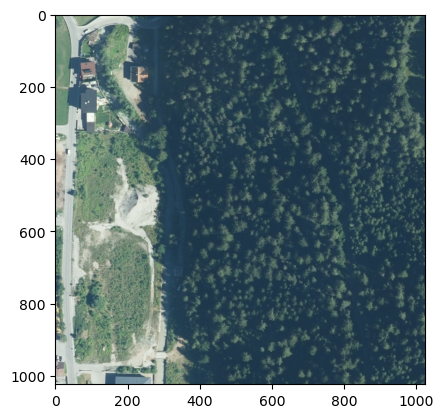

In [130]:
img = cv2.imread(val_images1[1])
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

imgi = augment_image(img)
# print(imgi.shape)
plt.imshow(imgi)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.1254902..1.02].


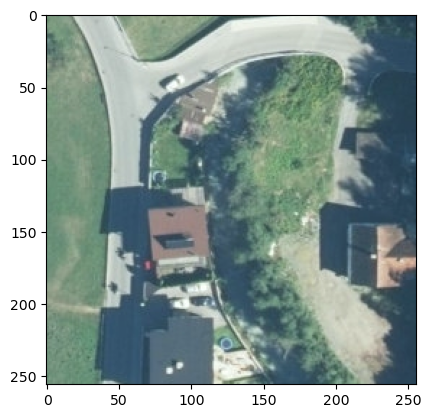

In [131]:
plt.imshow(imgi[:256,:256,:])

In [132]:
# plt.imshow(img.permute(1,2,0).numpy())


In [133]:
import tqdm
from tqdm import tqdm
for img_path in tqdm(val_images1):
    img = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
    img = augment_image(img)
    out = img_path.replace("New_dataset","Concat_dim_val_images").replace("Images","Val_images1")
    cv2.imwrite(out, img*255)
    

100%|██████████████████████████████████████████████████████████████████████████████████| 54/54 [00:03<00:00, 14.57it/s]


In [134]:
for img_path in tqdm(val_images2):
    img = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
    img = augment_image(img)
    out = img_path.replace("New_New_dataset","Concat_dim_val_images").replace("Images","Val_images2").replace(".tif",".jpg")
    cv2.imwrite(out, img*255)

100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:02<00:00,  1.67it/s]


In [ ]:
img = cv2.cvtColor(cv2.imread("data/dataset/Concat_dim_val_images/Images/TLS_BDSD_RGB_noGeo_16.tif"), cv2.COLOR_BGR2RGB)
cv2.imwrite("i.jpg" , img)

In [2]:
from src.data.building_datasets import *
import tqdm
from tqdm import tqdm

In [31]:
data1_dir = "data/dataset/New_dataset/Images"
images1 = glob(f"{data1_dir}/*.jpg")
masks1 = [i.replace("Images" , "Masks").replace("jpg","tif") for i in images1]

n_train1 = int(len(images1) * 0.8)

train_images1 = images1[:n_train1]
train_masks1 = masks1[:n_train1]

train_dataset1 = AccBuildingDataset(
    images=train_images1,
    masks=train_masks1,
    augment_factor=1, 
    transform=True, 
    building_threshold=0.2)

val_masks1 = masks1[n_train1:]
val_images1 =[i.replace("New_dataset","Concat_dim_val_images").replace("Masks","Val_images1").replace(".tif",".jpg")
              for i in val_masks1]


val_dataset1 = AccBuildingDataset(
    images=val_images1,
    masks=val_masks1,
    augment_factor=1, 
    transform=False,
    building_threshold=0.2)


data2_dir = "data/dataset/New_New_dataset/Images"
images2 = glob(f"{data2_dir}/*.tif")
masks2 = [i.replace("Images" , "Masks") for i in images2]

n_train2 = int(len(images2) * 0.8)

train_images2 = images2[:n_train2]
train_masks2 = masks2[:n_train2]

train_dataset2 = NewNewDataset(
    images=train_images2,
    masks=train_masks2,
    transform=True)

# val_images2 = images2[n_train2:]
# val_masks2 = masks2[n_train2:]
val_masks2 = masks2[n_train2:]
val_images2 = [i.replace("New_New_dataset","Concat_dim_val_images").replace("Masks","Val_images2").replace("tif","jpg") for i in
               val_masks2]



val_dataset2 = NewNewDataset(
    images=val_images2,
    masks=val_masks2,
    transform=False,
    )

train_list = [train_dataset1 , train_dataset2]
val_list = [val_dataset1,val_dataset2]
data_train = ConcatDataset(train_list)
data_val = ConcatDataset(val_list)

In [32]:
len(data_train) , len(data_val),len(images1),len(masks1),len(images2),len(masks2),len(val_images1),len(val_images2)

(3168, 1264, 266, 266, 16, 16, 54, 4)

In [33]:
val_images2[1]

'data/dataset/Concat_dim_val_images/Val_images2\\TLS_BDSD_RGB_noGeo_14.jpg'

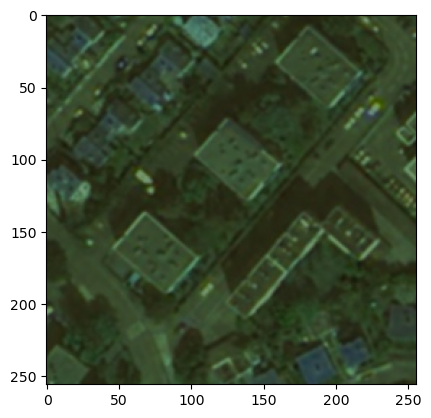

In [35]:
import matplotlib.pyplot as plt
img , mask = data_val[1200]
img
plt.imshow(img.permute(1,2,0).numpy())

# Testing Dataset Classes

In [ ]:
data_dir = "data/dataset/New_dataset/Images"

In [ ]:
images = glob(f"{data_dir}/*.jpg")
masks = [i.replace("Images" , "Masks").replace("jpg","tif") for i in images]

In [ ]:
len(images)

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def visualize_augmentation(image, mask):
    # Convert tensors back to numpy for visualization
    image_np = image.permute(1, 2, 0).numpy()  # HWC format
    mask_np = mask.squeeze(0).numpy()  # Remove channel dimension for grayscale

    # Create a red mask (3 channels)
    red_mask = np.zeros_like(image_np)  # Create an empty array with the same shape as the image
    red_mask[..., 0] = mask_np * 255  # Set red channel to mask values (255 for positive areas)

    # Use cv2.addWeighted for overlay
    overlay = cv2.addWeighted(image_np, 0.6, red_mask / 255.0, 0.4, 0)  # Blend with the original image

    # Display image and mask side-by-side
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    
    axs[0].imshow(image_np)
    axs[0].set_title('Image')
    axs[0].axis('off')
    
    axs[1].imshow(overlay)  # Show the overlay image
    axs[1].set_title('Overlayed Mask (in Red)')
    axs[1].axis('off')
    
    plt.show()

In [ ]:
# class AccBuildingDataset1(Dataset):
#     def __init__(self, images, masks, augment_factor=1, transform=True, building_threshold=0.15):
#         self.images = images
#         self.masks = masks
#         self.augment_factor = augment_factor
#         self.transform = transform
#         self.to_tensor = transforms.ToTensor()
#         self.building_threshold = building_threshold
#         self.valid_indices = self._filter_images()

#     def _filter_images(self):
#         valid_indices = []
#         for idx, (image_path, mask_path) in enumerate(zip(self.images, self.masks)):
#             mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
#             building_area = (mask > 0).sum() / mask.size
#             if building_area >= self.building_threshold:
#                 valid_indices.append(idx)
#         return valid_indices

#     def __len__(self):
#         return len(self.valid_indices) * 16 * self.augment_factor

#     def __getitem__(self, idx):
#         effective_index = (idx // self.augment_factor) % (len(self.valid_indices) * 16)
#         image_idx = self.valid_indices[effective_index // 16]
#         image_path = self.images[image_idx]
#         mask_path = self.masks[image_idx]
#         image = cv2.imread(image_path)
#         image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#         mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

#         patch_idx = effective_index % 16
#         x_offset = (patch_idx % 4) * 256
#         y_offset = (patch_idx // 4) * 256
#         image_patch = image[y_offset:y_offset + 256, x_offset:x_offset + 256]
#         mask_patch = mask[y_offset:y_offset + 256, x_offset:x_offset + 256]

#         image_patch = self.to_tensor(image_patch)
#         mask_patch = torch.from_numpy(mask_patch).float() / 255.0
#         mask_patch = mask_patch.unsqueeze(0)
#         # print("Augmentation function called.")

#         if (self.transform==True):
#             # print("Augmentation function called.")
#             image_patch, mask_patch = augment_image_with_mask(image_patch, mask_patch)

#         return image_patch, mask_patch

In [ ]:
def augment_image_w1ith_mask(image, mask):
    print("Augmentation function called.")

    seed = np.random.randint(2147483647)
    
    spatial_transforms = transforms.Compose([
        transforms.RandomResizedCrop(size=(256, 256), scale=(0.8, 1.2)),  
        transforms.RandomHorizontalFlip(p=0.5),
        transforms.RandomVerticalFlip(p=0.5),
        transforms.RandomRotation(degrees=15),
    ])
    
    photometric_transforms = transforms.Compose([
        # transforms.ColorJitter(brightness=0.1, contrast=0.2, saturation=0.2, hue=0.2),  
        transforms.GaussianBlur(kernel_size=(3, 3), sigma=(0.1, 2.0)), 
        transforms.Lambda(lambda img: transforms.F.adjust_brightness(img, 0.8)),  
        transforms.Lambda(lambda img: img + torch.tensor([0.0, 0.05, 0.0], device=img.device).view(3, 1, 1)),  
    ])
    
    torch.manual_seed(seed)
    image = spatial_transforms(image)
    torch.manual_seed(seed)
    mask = spatial_transforms(mask)

    image = photometric_transforms(image)

    return image, mask

In [ ]:
dataset = AccBuildingDataset(
    images=images,
    masks=masks,
    augment_factor=1, 
     
    building_threshold=0.15)

In [ ]:
len(dataset)

In [ ]:
idx = 0
image, mask = dataset[idx]
visualize_augmentation(image,mask)

In [ ]:
mask

In [ ]:
len(dataset)

# Testing Lightning DataModule

In [ ]:
import hydra
import lightning as pl
import omegaconf
from lightning import Callback, LightningDataModule, LightningModule, Trainer

In [ ]:
cfg = omegaconf.OmegaConf.load("configs/data/building_data.yaml")
datamodule: LightningDataModule = hydra.utils.instantiate(cfg)
datamodule.setup()

In [ ]:
data_train = datamodule.data_train
data_val = datamodule.data_val

In [ ]:
idx = 30
image, mask = data_train[idx]
visualize_augmentation(image,mask)

In [ ]:
idx = 30
image, mask = data_val[idx]
visualize_augmentation(image,mask)

In [ ]:
for data in datamodule.train_dataloader():
    break

In [ ]:
data[0].shape, data[1].shape

In [ ]:
mask

### NEW NEW DATASET

In [ ]:
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
images = glob("data/dataset/New_New_Dataset/Images/*tif")
masks = [i.replace("Images","Masks") for i in images]
i=15
image = cv2.cvtColor(cv2.imread(images[i]), cv2.COLOR_BGR2RGB)
mask = cv2.cvtColor(cv2.imread(masks[i]), cv2.COLOR_BGR2RGB)

mask = np.where(mask[:,:,0] == 238 , 1,0)
# plt.imshow(bmask , cmap = "gray")
# visualize_augmentation(image[:1024,:1024,:],bmask[:1024,:1024])
mask = np.pad(image, ((66, 66), (40, 40), (0, 0)), mode='constant', constant_values=0)
mask.shape

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def visualize_augmentation_1(image, mask):
    # Convert tensors back to numpy for visualization
    image_np = image/255 # HWC format
    mask_np = mask # Remove channel dimension for grayscale

    # Create a red mask (3 channels)
    red_mask = np.zeros_like(image_np)  # Create an empty array with the same shape as the image
    red_mask[:,:, 0] = mask_np * 255  # Set red channel to mask values (255 for positive areas)

    # Use cv2.addWeighted for overlay
    overlay = cv2.addWeighted(image_np, 0.6, red_mask / 255.0, 0.4, 0)  # Blend with the original image

    # Display image and mask side-by-side
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    
    axs[0].imshow(image_np)
    axs[0].set_title('Image')
    axs[0].axis('off')
    
    axs[1].imshow(overlay)  # Show the overlay image
    axs[1].set_title('Overlayed Mask (in Red)')
    axs[1].axis('off')
    
    plt.show()

In [ ]:
# (3452, 3504, 3)
((3504+80)*(3452+132))/(256*256)
(3504+80)

In [ ]:
from torch.utils.data import Dataset
from torchvision.transforms import transforms

class NewNewDataset(Dataset):
    def __init__(self,images,masks,transform = False):
        self.images = images
        self.masks = masks
        self.transform = transform
        self.to_tensor = transforms.ToTensor()

    def __len__(self):
        return len(self.images)*196

    def __getitem__(self,idx):
        image_idx = idx // 196
        image_path = self.images[image_idx]
        mask_path = self.masks[image_idx]
        
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        mask = cv2.imread(mask_path)
        image = np.pad(image, ((66, 66), (40, 40), (0, 0)), mode='constant', constant_values=0)
        mask = np.pad(mask, ((66, 66), (40, 40), (0, 0)), mode='constant', constant_values=0)
        mask = np.where(mask[:,:,2] == 238 , 1,0)
        
        patch_idx = idx % 196
        x_offset = (patch_idx % 14) * 256
        y_offset = (patch_idx // 14) * 256
        image_patch = image[y_offset:y_offset + 256, x_offset:x_offset + 256]
        mask_patch = mask[y_offset:y_offset + 256, x_offset:x_offset + 256]
    
        image_patch = self.to_tensor(image_patch)
        mask_patch = torch.from_numpy(mask_patch).float()
        mask_patch = mask_patch.unsqueeze(0)

        if self.transform:
            image_patch, mask_patch = augment_image_with_mask(image_patch, mask_patch)

        return image_patch, mask_patch

In [ ]:
data = NewNewDataset(images , masks)
a,b = data[222]
visualize_augmentation(a,b)

In [ ]:
plt.imshow(b.permute(1,2,0).numpy() , cmap = "gray")


In [ ]:
np.sqrt(10)

In [ ]:
img = cv2.imread("data/dataset/Concat_dim_val_images/Val_images2/TLS_BDSD_RGB_noGeo_16.tif")
plt.imshow(img)